In [3042]:
#Basic and most important libraries
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3043]:
df = pd.read_csv("TaxiFare.csv")
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


<Axes: >

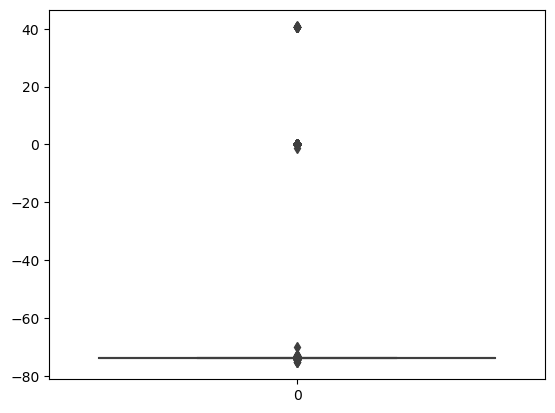

In [3044]:
sns.boxplot(df["longitude_of_pickup"])

<Axes: >

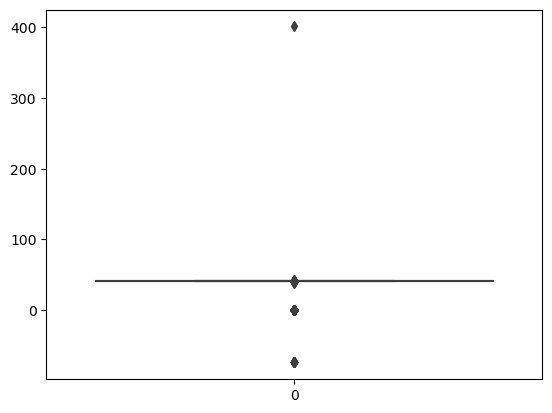

In [3045]:
sns.boxplot(df["latitude_of_pickup"])

<Axes: >

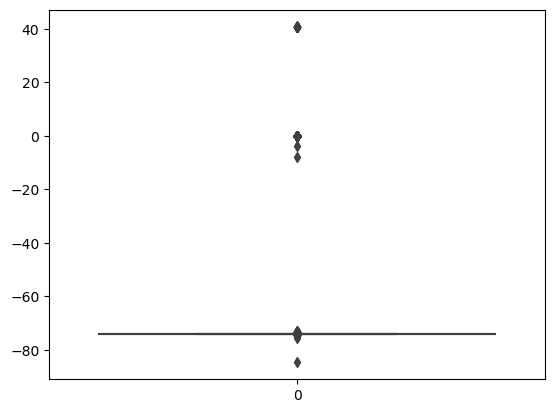

In [3046]:
sns.boxplot(df["longitude_of_dropoff"])

<Axes: >

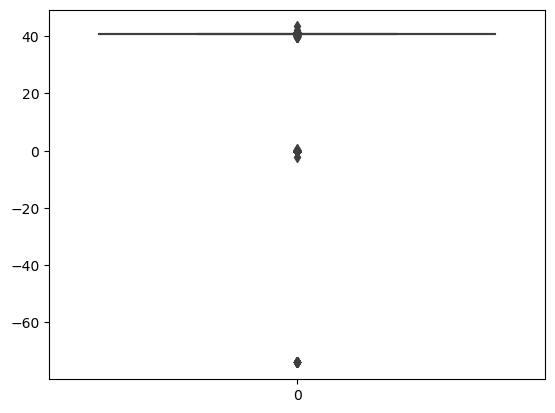

In [3047]:
sns.boxplot(df["latitude_of_dropoff"])

In [3048]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

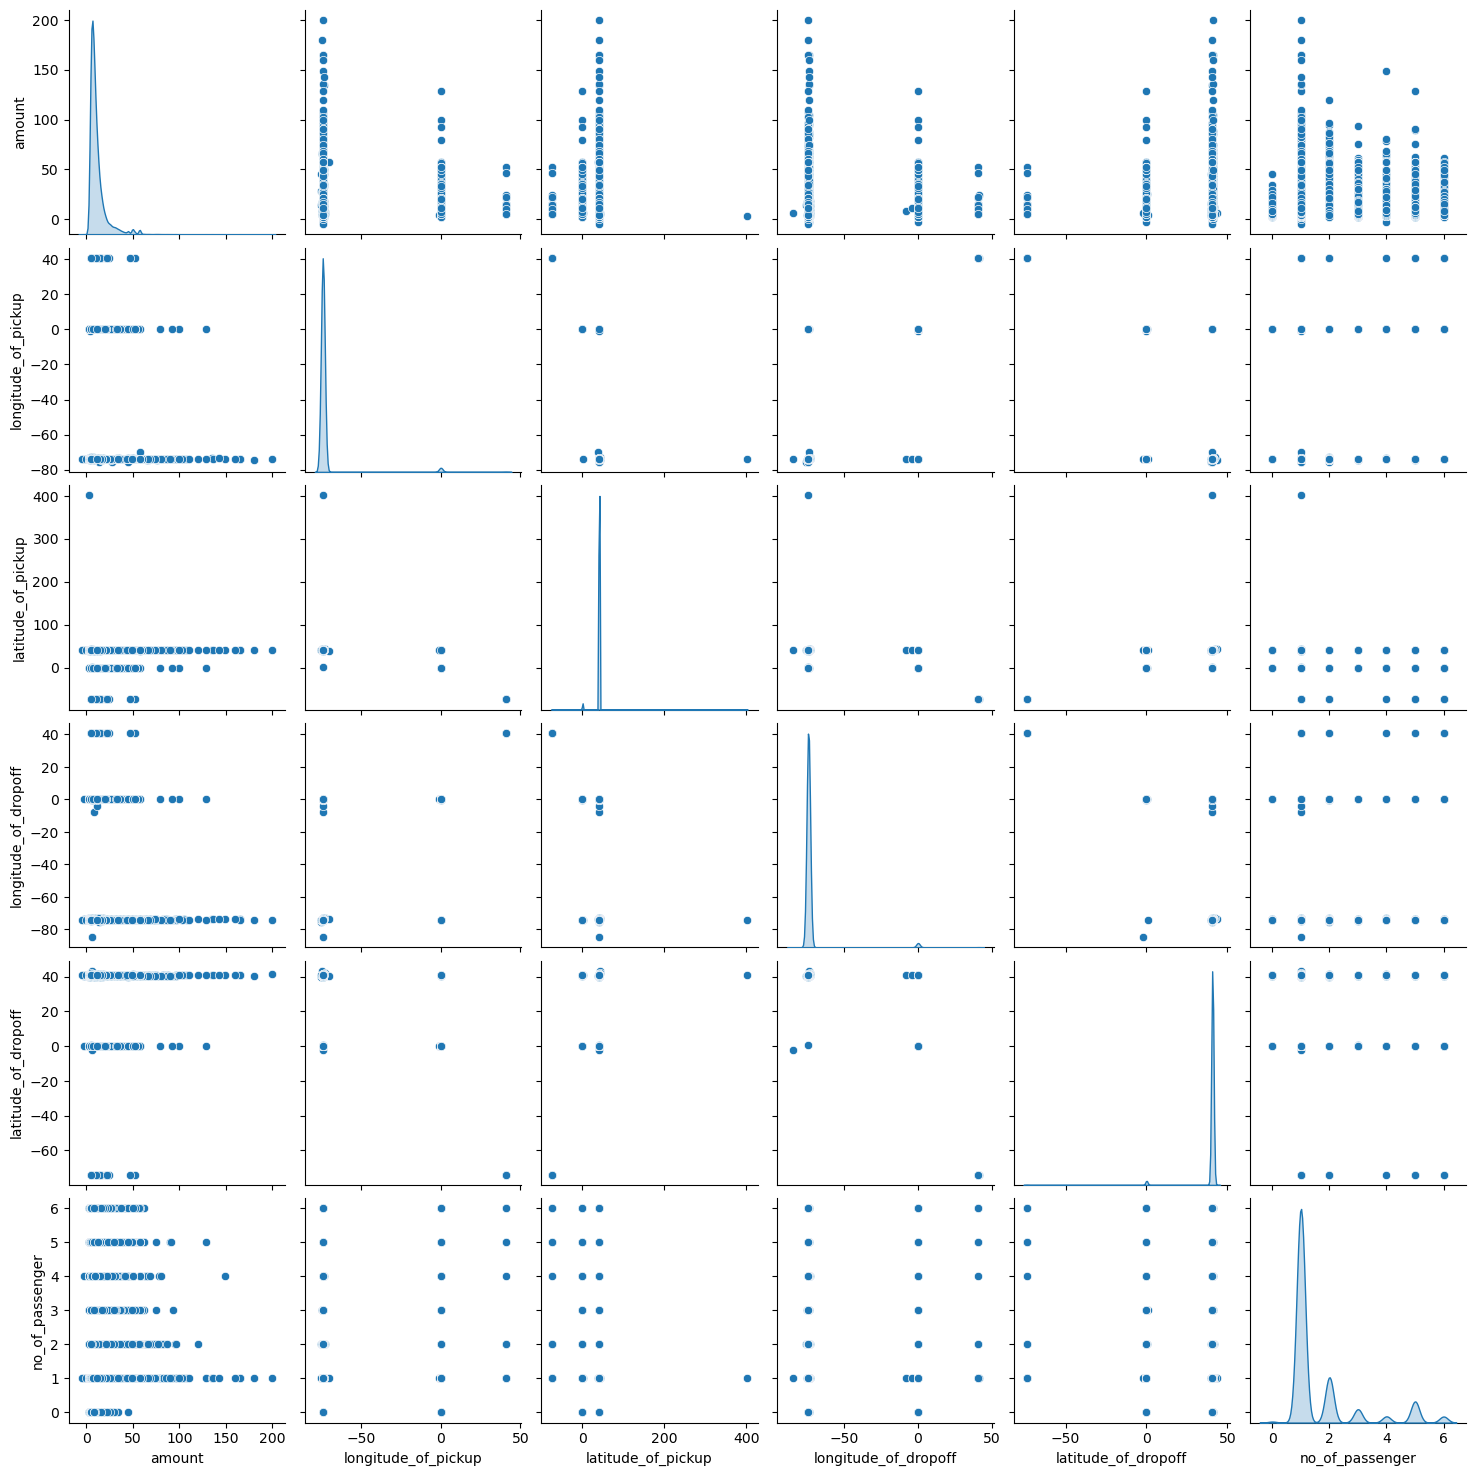

In [3049]:
sns.pairplot(df,diag_kind="kde")

In [3050]:
df = df.drop(['unique_id'],axis=1)

In [3051]:
## before object of date_time_of_pickup is convert to datetime format  ##
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

## new colunm create (fearture) on 'date_time_of_pickup' (extract date,day,hour, month,year etc from 'date_time_of_pickup' and make new column)

import calendar

df['date_of_pickup']= df['date_time_of_pickup'].dt.date
df['day_of_pickup']= df['date_time_of_pickup'].apply(lambda x:x.day)
df['hour_of_pickup']= df['date_time_of_pickup'].apply(lambda x:x.hour)
df['day_of_ week_of_pickup']= df['date_time_of_pickup'].apply(lambda x:calendar.day_name[x.weekday()])
df['month_of_pickup']= df['date_time_of_pickup'].apply(lambda x:x.month)
df['year_of_pickup']= df['date_time_of_pickup'].apply(lambda x:x.year)

df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date_of_pickup,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [3052]:
#imputing Categorical Variable
#  Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, and Saturday.
convert_to_number = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
year = {2009:1, 2010:2, 2011:3, 2012:4, 2013:5, 2014:6, 2015:7}
df['year_of_pickup']=df['year_of_pickup'].map(year)
df['day_of_ week_of_pickup']=df['day_of_ week_of_pickup'].map(convert_to_number)
df.drop(['date_time_of_pickup','date_of_pickup'],axis=1,inplace=True)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2


In [3053]:
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2


In [3054]:
dfn = df.copy()
dfn.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2


In [3055]:
q1 = dfn["longitude_of_pickup"].quantile(0.25)
q3 = dfn["longitude_of_pickup"].quantile(0.75)
IQR = q3-q1
lower_range=q1-(1.5*IQR)
upper_range=q3+(1.5*IQR)
print(lower_range)
print(upper_range)
dfn = dfn[dfn['longitude_of_pickup']<upper_range]
dfn = dfn[dfn['longitude_of_pickup']>lower_range]

-74.029433
-73.92977700000002


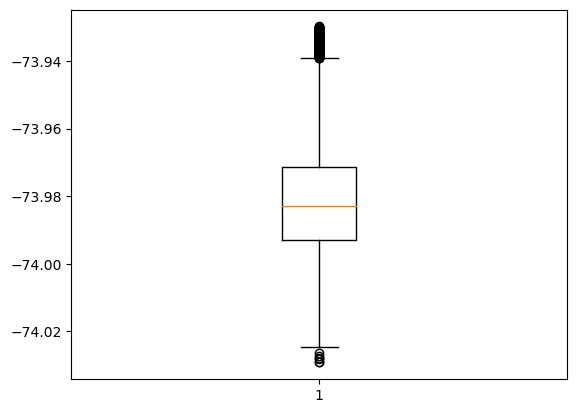

In [3056]:
plt.boxplot(dfn['longitude_of_pickup'])
plt.show()

In [3057]:
q1 = dfn["latitude_of_pickup"].quantile(0.25)
q3 = dfn["latitude_of_pickup"].quantile(0.75)
IQR = q3-q1
lower_range=q1-(1.5*IQR)
upper_range=q3+(1.5*IQR)
print(lower_range)

40.69262225


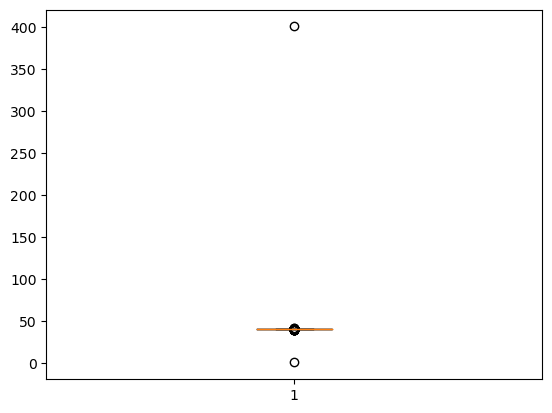

In [3058]:
plt.boxplot(dfn['latitude_of_pickup'])
plt.show()

In [3059]:
dfn['latitude_of_pickup'] = np.where(
    dfn['latitude_of_pickup']>upper_range,
    upper_range,
    np.where(
        dfn['latitude_of_pickup']<lower_range,
        lower_range,
        dfn['latitude_of_pickup']
    )
)

In [3060]:
q1 = dfn["longitude_of_dropoff"].quantile(0.25)
q3 = dfn["longitude_of_dropoff"].quantile(0.75)
IQR = q3-q1
lower_range=q1-(1.5*IQR)
upper_range=q3+(1.5*IQR)
print(lower_range)
print(upper_range)

-74.02903975
-73.92898175


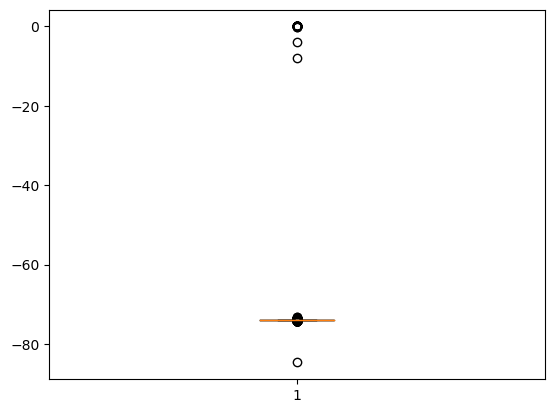

In [3061]:
plt.boxplot(dfn['longitude_of_dropoff'])
plt.show()

In [3062]:
dfn['longitude_of_dropoff'] = np.where(
    dfn['longitude_of_dropoff']>upper_range,
    upper_range,
    np.where(
        dfn['longitude_of_dropoff']<lower_range,
        lower_range,
        dfn['longitude_of_dropoff']
    )
)

In [3063]:
q1 = dfn["latitude_of_dropoff"].quantile(0.25)
q3 = dfn["latitude_of_dropoff"].quantile(0.75)
IQR = q3-q1
lower_range=q1-(1.5*IQR)
upper_range=q3+(1.5*IQR)
print(lower_range)
print(upper_range)

40.68764250000001
40.81719849999999


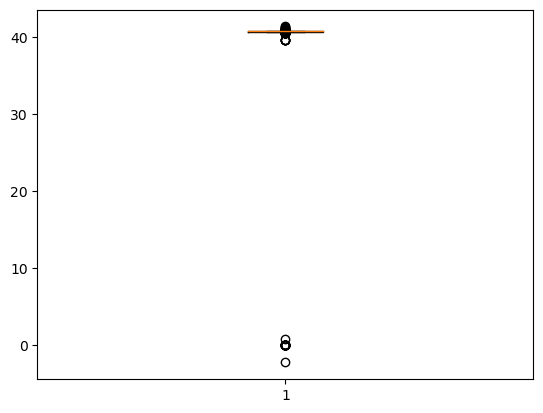

In [3064]:
plt.boxplot(dfn['latitude_of_dropoff'])
plt.show()

In [3065]:
dfn['latitude_of_dropoff'] = np.where(
    dfn['latitude_of_dropoff']>upper_range,
    upper_range,
    np.where(
        dfn['latitude_of_dropoff']<lower_range,
        lower_range,
        dfn['latitude_of_dropoff']
    )
)

In [3066]:
print((dfn['longitude_of_pickup'] > upper_range).sum().sum())
print((dfn['longitude_of_pickup'] < lower_range).sum().sum())

0
46571


In [3067]:
# print((dfn['no_of_passenger'] > 3).sum().sum())
print((dfn['amount'] < 0 ).sum().sum())
print((dfn['no_of_passenger'] > 3).sum().sum())
print((dfn['no_of_passenger'] == 0).sum().sum())

4
5063
151


In [3068]:
# dfn = dfn.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1)

In [3069]:
dfn.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
count,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000
mean,10.358758,-73.981736,40.752106,-73.978159,40.752166,1.665779,15.664426,13.465955,4.039424,6.264091,3.734899
std,7.779347,0.016324,0.022696,0.020100,0.026368,1.287698,8.660740,6.516066,1.951273,3.463472,1.863987
min,-5.000000,-74.029201,40.692622,-74.029040,40.687643,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,6.000000,-73.992851,40.737032,-73.991518,40.736226,1.000000,8.000000,9.000000,2.000000,3.000000,2.000000
50%,8.100000,-73.982800,40.753185,-73.980803,40.754150,1.000000,16.000000,14.000000,4.000000,6.000000,4.000000
75%,12.000000,-73.971339,40.766638,-73.966504,40.768615,2.000000,23.000000,19.000000,6.000000,9.000000,5.000000
max,200.000000,-73.929810,40.811048,-73.928982,40.817198,6.000000,31.000000,23.000000,7.000000,12.000000,7.000000


In [3070]:
dfn.isnull().sum()

amount                    0
longitude_of_pickup       0
latitude_of_pickup        0
longitude_of_dropoff      0
latitude_of_dropoff       0
no_of_passenger           0
day_of_pickup             0
hour_of_pickup            0
day_of_ week_of_pickup    0
month_of_pickup           0
year_of_pickup            0
dtype: int64

In [3071]:
dfn.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,6,9,4,1,3


In [3072]:
print((dfn['amount'] > 22.25 ).sum().sum())

2634


In [3073]:
q1 = dfn["amount"].quantile(0.25)
q3 = dfn["amount"].quantile(0.75)
IQR = q3-q1
lower_range=q1-(1.5*IQR)
upper_range=q3+(1.5*IQR)
print(lower_range)
print(upper_range)
lowest_price = 0

-3.0
21.0


In [3074]:
print(lower_range)
print(upper_range)

-3.0
21.0


In [3075]:
print((dfn['amount'] > 22.25 ).sum().sum())
print((dfn['amount'] == 0 ).sum().sum())

2634
2


In [3076]:
dfn['amount'] = np.where(
    dfn['amount']>upper_range,
    upper_range,
    np.where(
        dfn['amount']<lower_range,
        lowest_price,
        dfn['amount']
    )
)

In [3077]:
dfn.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
count,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000,46571.000000
mean,9.598071,-73.981736,40.752106,-73.978159,40.752166,1.665779,15.664426,13.465955,4.039424,6.264091,3.734899
std,4.864015,0.016324,0.022696,0.020100,0.026368,1.287698,8.660740,6.516066,1.951273,3.463472,1.863987
min,-3.000000,-74.029201,40.692622,-74.029040,40.687643,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,6.000000,-73.992851,40.737032,-73.991518,40.736226,1.000000,8.000000,9.000000,2.000000,3.000000,2.000000
50%,8.100000,-73.982800,40.753185,-73.980803,40.754150,1.000000,16.000000,14.000000,4.000000,6.000000,4.000000
75%,12.000000,-73.971339,40.766638,-73.966504,40.768615,2.000000,23.000000,19.000000,6.000000,9.000000,5.000000
max,21.000000,-73.929810,40.811048,-73.928982,40.817198,6.000000,31.000000,23.000000,7.000000,12.000000,7.000000


In [3078]:
(dfn['no_of_passenger'] > 3).sum().sum()

5063

In [3079]:
q1 = dfn["no_of_passenger"].quantile(0.25)
q3 = dfn["no_of_passenger"].quantile(0.75)
IQR = q3-q1
lower_range=q1-(1.5*IQR)
upper_range=q3+(1.5*IQR)

In [3080]:
print(lower_range)
print(upper_range)

-0.5
3.5


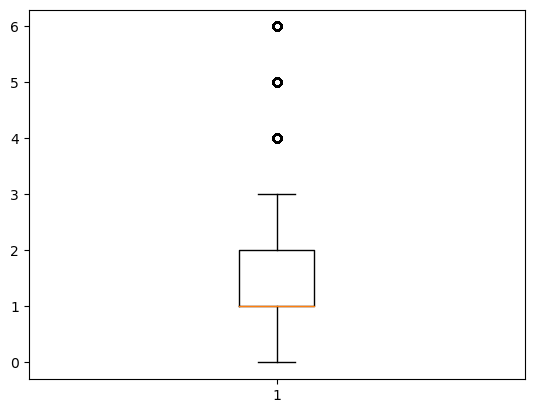

In [3081]:
plt.boxplot(dfn['no_of_passenger'])
plt.show()

In [3082]:
print((dfn['no_of_passenger'] > 3).sum().sum())
print((dfn['no_of_passenger'] == 0).sum().sum())

5063
151


In [3083]:
dfn.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,6,9,4,1,3


In [3084]:
def distance (lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 #pi/180
    a = 0.5  - np.cos((lat2 - lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2 * p) * (1-np.cos((lon2 - lon1) * p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

#create new column to dataframe with distance in miles

dfn['distane_in_miles'] = distance(dfn.latitude_of_pickup, dfn.longitude_of_pickup, dfn.latitude_of_dropoff, dfn.longitude_of_dropoff)

dfn.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup,distane_in_miles
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2,1.242218
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,6,9,4,1,3,2.353281


In [3085]:
# dfn = dfn.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1)

In [3086]:
q1 = dfn["distane_in_miles"].quantile(0.25)
q3 = dfn["distane_in_miles"].quantile(0.75)
IQR = q3-q1
lower_range=q1-(1.5*IQR)
upper_range=q3+(1.5*IQR)
print(lower_range)
print(upper_range)

-1.4136768408016591
4.409319056041568


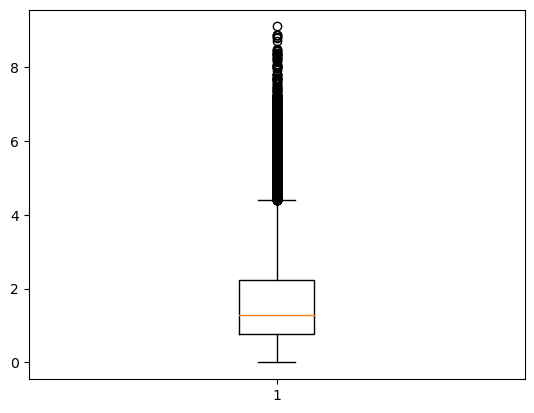

In [3087]:
# sns.boxplot(dfn["distane_in_miles"])
plt.boxplot(dfn['distane_in_miles'])
plt.show()

In [3088]:
dfn['distane_in_miles'] = np.where(
    dfn['distane_in_miles']>upper_range,
    upper_range,
    np.where(
        dfn['distane_in_miles']<lower_range,
        lower_range,
        dfn['distane_in_miles']
    )
)

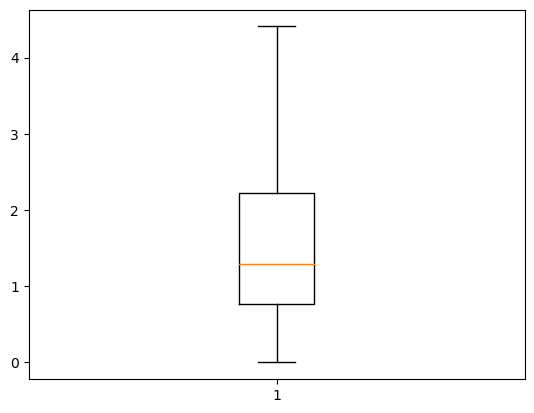

In [3089]:
plt.boxplot(dfn['distane_in_miles'])
plt.show()

In [3090]:
Y = dfn[['amount']]
X = dfn.drop(['amount'], axis=1)

In [3091]:
Y.head()

,amount
1,16.9
2,5.7
3,7.7
4,5.3
5,12.1


In [3092]:
X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day_of_pickup,hour_of_pickup,day_of_ week_of_pickup,month_of_pickup,year_of_pickup,distane_in_miles
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2,4.409319
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,3,0.863411
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,4,1.739386
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2,1.242218
5,-74.000964,40.731630,-73.972892,40.758233,1,6,9,4,1,3,2.353281


In [3093]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [3094]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(32599, 11)
(13972, 11)
(32599, 1)
(13972, 1)


In [3095]:
from sklearn.linear_model import LinearRegression

In [3096]:
reg = LinearRegression()

In [3097]:
reg.fit(X_train, Y_train)

LinearRegression()

In [3098]:
y_pred = reg.predict(X_test)

In [3099]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred)

In [3100]:
print(score)

0.7261304117542061


In [3101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 1.7562592946836424
MSE: 6.408110816831527
RMSE: 2.531424661496274


In [3102]:
dfn.shape

(46571, 12)